In [364]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [365]:
df = pd.read_csv('/Users/jimmy/Desktop/ads500b/final/house_sales.csv', header=0, sep=',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [366]:
# Check for missing data
df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [367]:
# Replace missing values with mean
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

Text(0.5, 1.0, 'Housing Correlation Heatmap')

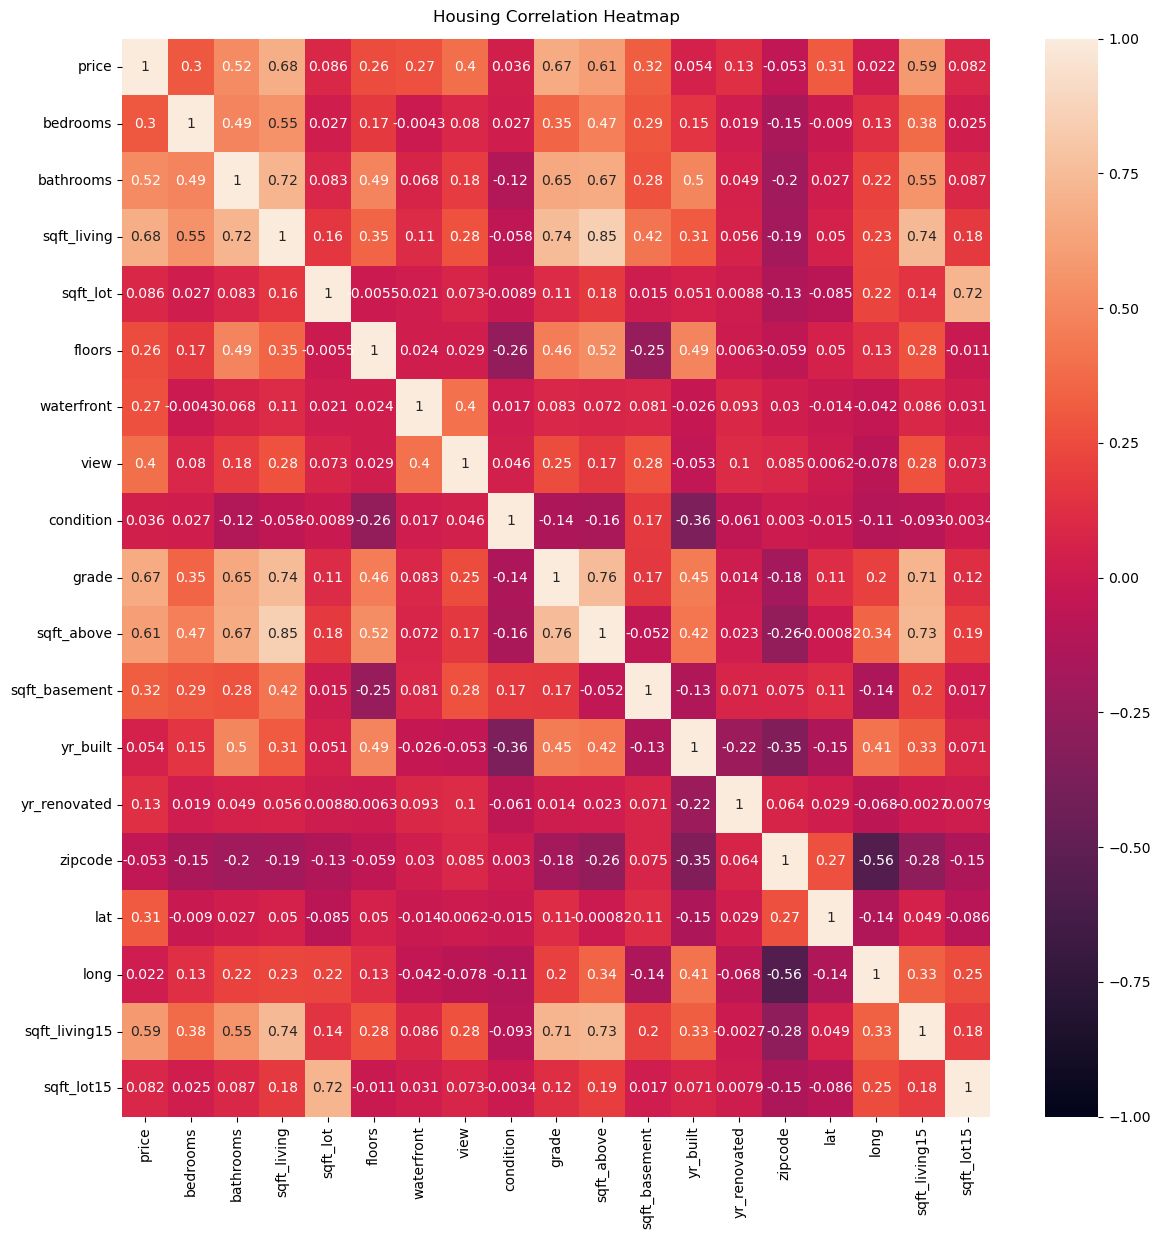

In [425]:
# Heatmap with all variables
plt.figure(figsize = (14, 14))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Housing Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

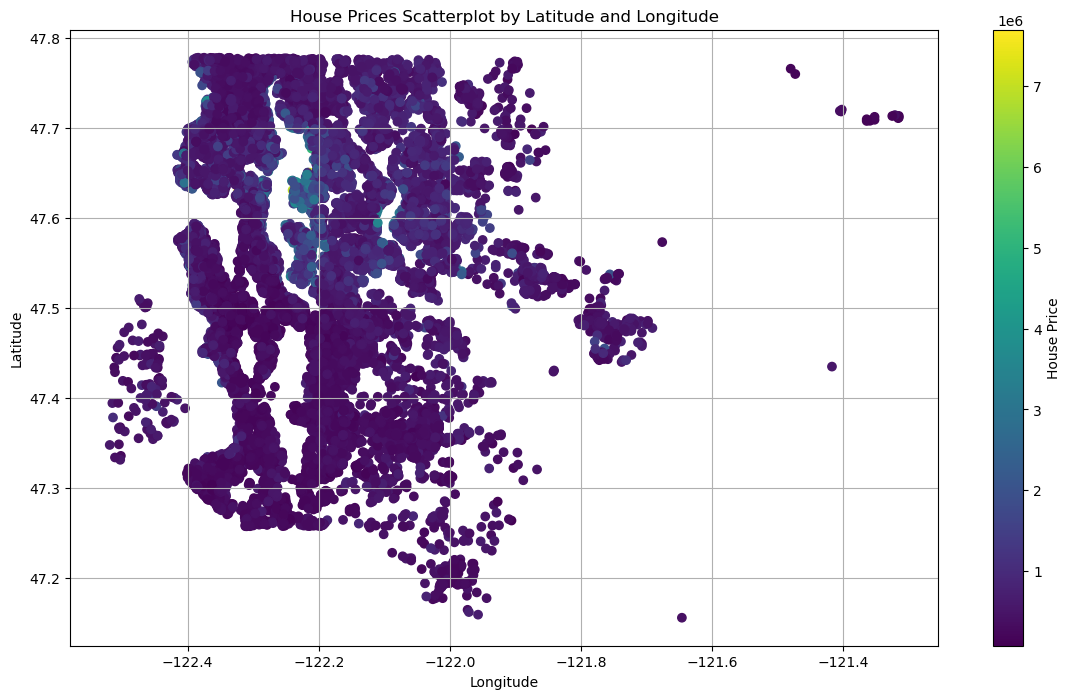

In [437]:
# House price map based on latitude and longitude

plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('House Price')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices Scatterplot by Latitude and Longitude')
plt.grid(True)
plt.show()

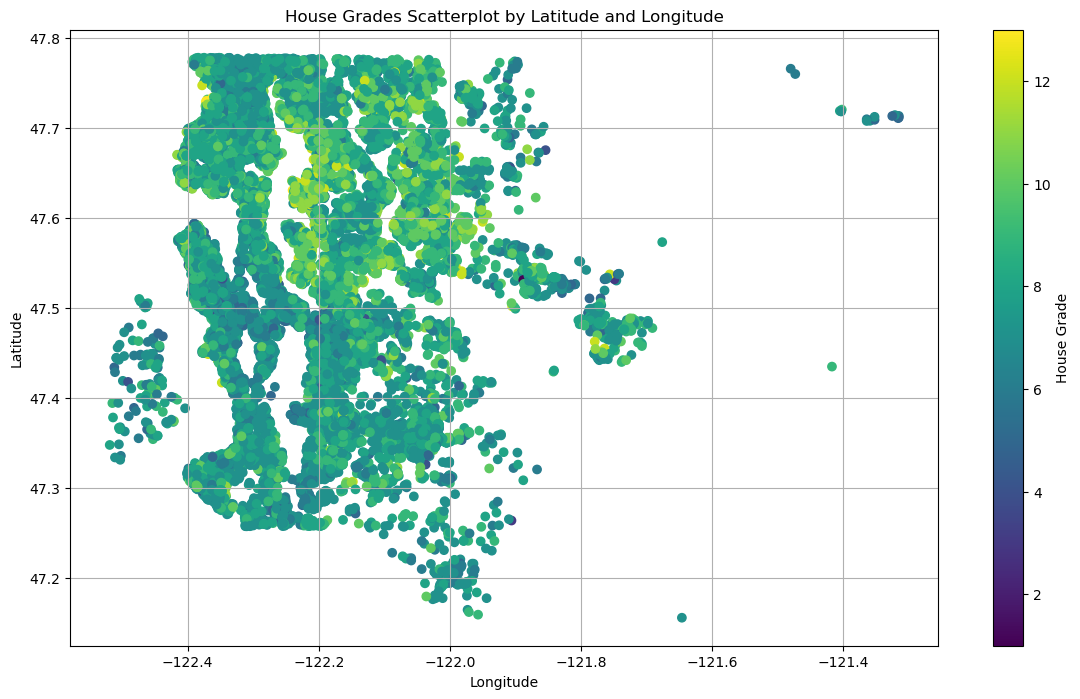

In [423]:
# House grade map based on latitude and longitude

plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['long'], df['lat'], c=df['grade'], cmap='viridis')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('House Grade')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Grades Scatterplot by Latitude and Longitude')
plt.grid(True)
plt.show()

In [341]:
# Check for multicollinearity #1
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

vif_data

,Feature,VIF
0,price,1.051642e+01
1,bedrooms,2.388440e+01
2,bathrooms,2.706214e+01
3,sqft_living,1.108405e+02
4,sqft_lot,2.381284e+00
5,floors,1.670046e+01
6,waterfront,1.276216e+00
7,view,1.594336e+00
8,condition,3.490592e+01
9,grade,1.607591e+02


In [342]:
df = df[['price', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_renovated']]

# Check for multicollinearity #2
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

vif_data

,Feature,VIF
0,price,4.745155
1,sqft_lot,1.148622
2,floors,7.348054
3,waterfront,1.233057
4,view,1.516069
5,condition,7.077197
6,sqft_basement,1.890148
7,yr_renovated,1.067432


In [375]:
# Subset dataframe with variables with low multicollinearity
df_new = df.loc[:,['price', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_renovated']]
df_new

,price,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_renovated
0,221900.0,5650.0,1.0,0,0,3,0,0
1,538000.0,7242.0,2.0,0,0,3,400,1991
2,180000.0,10000.0,1.0,0,0,3,0,0
3,604000.0,5000.0,1.0,0,0,5,910,0
4,510000.0,8080.0,1.0,0,0,3,0,0
...,...,...,...,...,...,...,...,...
21608,360000.0,1131.0,3.0,0,0,3,0,0
21609,400000.0,5813.0,2.0,0,0,3,0,0
21610,402101.0,1350.0,2.0,0,0,3,0,0
21611,400000.0,2388.0,2.0,0,0,3,0,0


In [376]:
# Description of variables
df_new.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_renovated
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,15179.82,1.49,0.01,0.23,3.41,291.51,84.40
std,367127.20,40471.74,0.54,0.09,0.77,0.65,442.58,401.68
min,75000.00,520.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,321950.00,5140.00,1.00,0.00,0.00,3.00,0.00,0.00
50%,450000.00,7830.00,1.50,0.00,0.00,3.00,0.00,0.00
75%,645000.00,11867.00,2.00,0.00,0.00,4.00,560.00,0.00
max,7700000.00,1651359.00,3.50,1.00,4.00,5.00,4820.00,2015.00


In [377]:
# Correlation matrix
corr_matrix = df_new.corr()
corr_matrix

,price,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_renovated
price,1.000000,0.086295,0.256794,0.266369,0.397293,0.036362,0.323816,0.126434
sqft_lot,0.086295,1.000000,-0.005540,0.020712,0.072944,-0.008930,0.015212,0.008758
floors,0.256794,-0.005540,1.000000,0.023698,0.029444,-0.263768,-0.245705,0.006338
waterfront,0.266369,0.020712,0.023698,1.000000,0.401857,0.016653,0.080588,0.092885
view,0.397293,0.072944,0.029444,0.401857,1.000000,0.045990,0.276947,0.103917
condition,0.036362,-0.008930,-0.263768,0.016653,0.045990,1.000000,0.174105,-0.060618
sqft_basement,0.323816,0.015212,-0.245705,0.080588,0.276947,0.174105,1.000000,0.071323
yr_renovated,0.126434,0.008758,0.006338,0.092885,0.103917,-0.060618,0.071323,1.000000


Text(0.5, 1.0, 'Housing Correlation Heatmap')

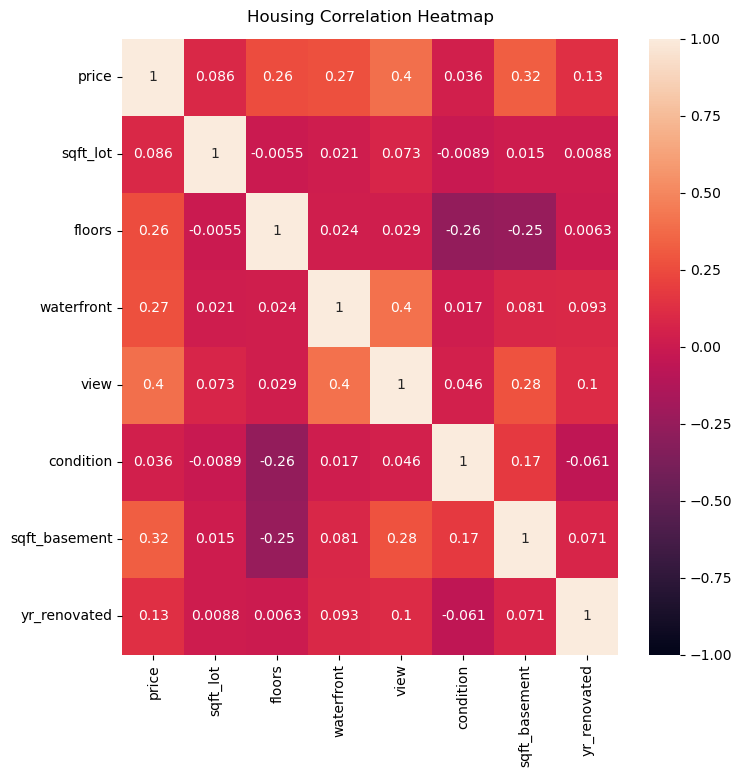

In [378]:
# Correlation matrix with non-multicollinearity variables
plt.figure(figsize = (8, 8))
heatmap_no_mc = sns.heatmap(df_new.corr(), vmin = -1, vmax = 1, annot = True)
heatmap_no_mc.set_title('Housing Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

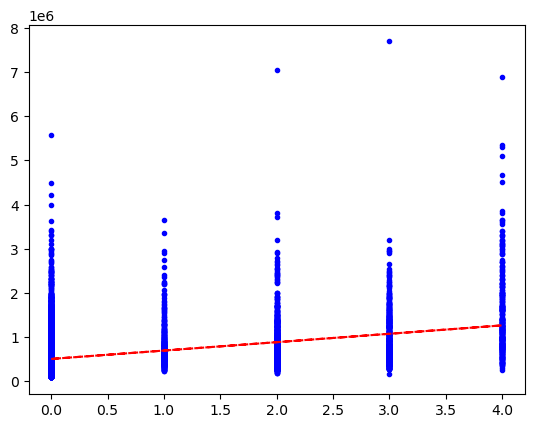

In [379]:
# View vs price regression
coef_price_view = np.polyfit(df_new['view'], df_new['price'], 1)

poly1d_price_view = np.poly1d(coef_price_view)
plt.plot(df_new['view'], df_new['price'], 'b.', df_new['view'], poly1d_price_view(df_new['view']), '--r')

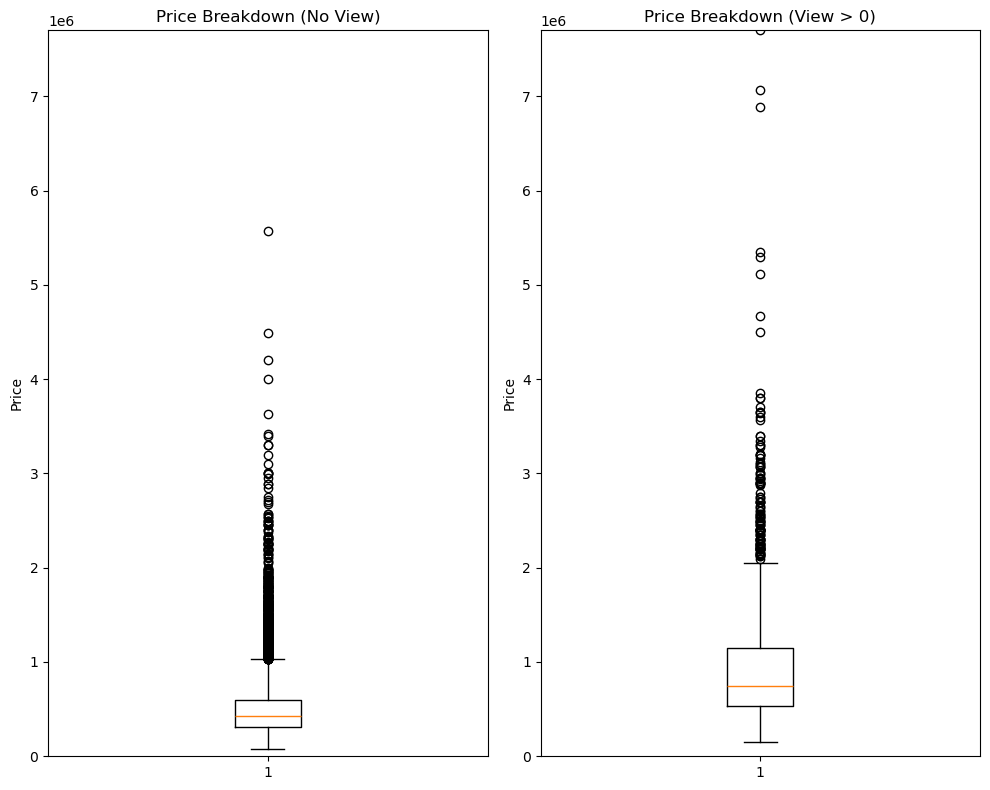

In [380]:
# View vs price boxplot

# Filter the data based on the condition
no_view_data = df_new[df_num['view'] == 0]  # Data when view is 0 (no view)
view_data = df_num[df_new['view'] > 0]      # Data when view is greater than 0

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Create the first boxplot (no view)
ax[0].boxplot(no_view_data['price'])
ax[0].set_title('Price Breakdown (No View)')
ax[0].set_ylabel('Price')

# Create the second boxplot (view > 0)
ax[1].boxplot(view_data['price'])
ax[1].set_title('Price Breakdown (View > 0)')
ax[1].set_ylabel('Price')

ymin = min(0, 0)
ymax = max(no_view_data['price'].max(), view_data['price'].max())
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

# Display the boxplots
plt.tight_layout()
plt.show()

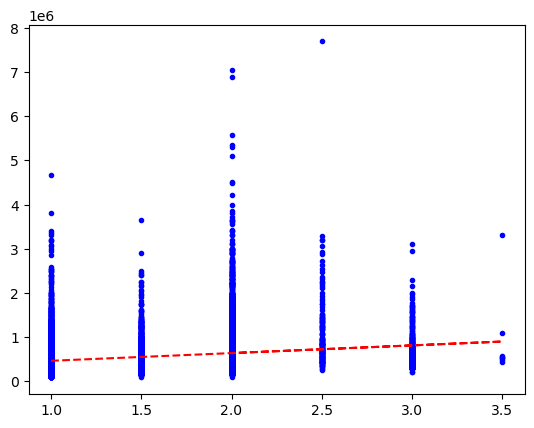

In [381]:
# Floors and price regression
coef_price_floors = np.polyfit(df_new['floors'], df_new['price'], 1)

poly1d_price_floors = np.poly1d(coef_price_floors)
plt.plot(df_new['floors'],df_new['price'], 'b.', df_new['floors'], poly1d_price_floors(df_new['floors']), '--r')

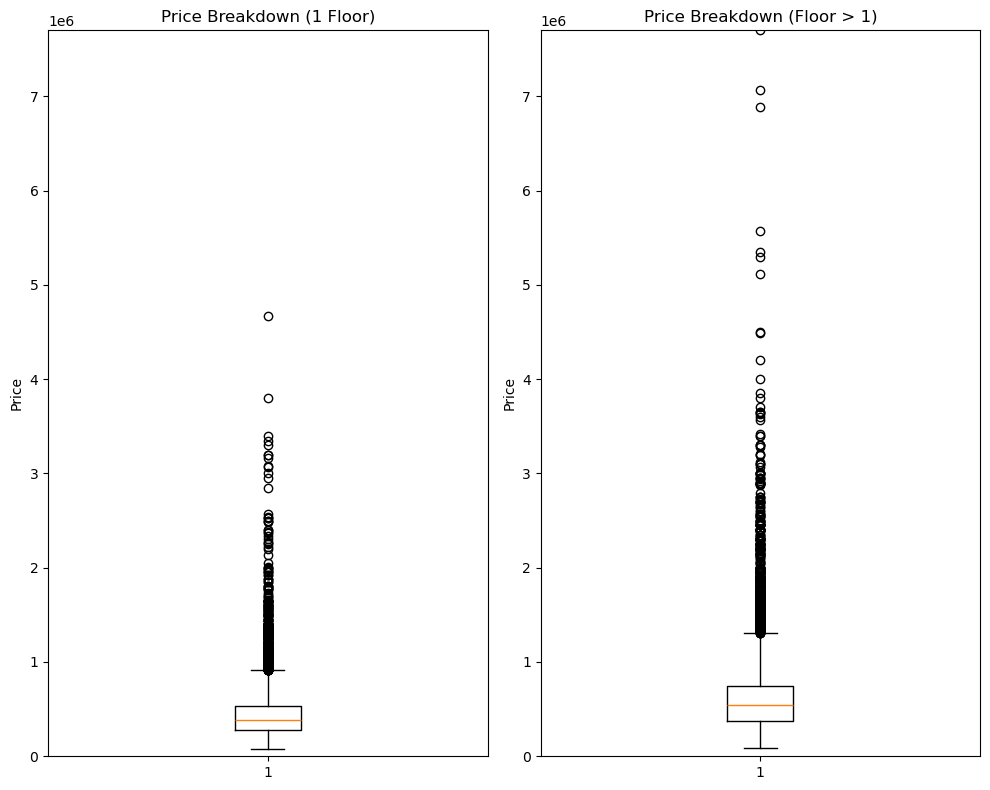

In [382]:
# Floors vs price

# Filter the data based on the condition
one_floor_data = df_new[df_new['floors'] == 1]  # Data when floors is 1
mult_floors_data = df_new[df_new['floors'] > 1]      # Data when floors is greater than 1

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Create the first boxplot (no view)
ax[0].boxplot(one_floor_data['price'])
ax[0].set_title('Price Breakdown (1 Floor)')
ax[0].set_ylabel('Price')

# Create the second boxplot (view > 0)
ax[1].boxplot(mult_floors_data['price'])
ax[1].set_title('Price Breakdown (Floor > 1)')
ax[1].set_ylabel('Price')

ymin = min(0, 0)
ymax = max(one_floor_data['price'].max(), mult_floors_data['price'].max())
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

# Display the boxplots
plt.tight_layout()
plt.show()

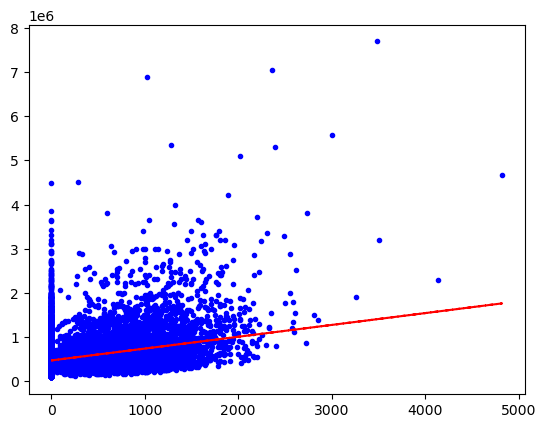

In [383]:
# Price and basement regression
coef_price_basement = np.polyfit(df_new['sqft_basement'], df_new['price'], 1)

poly1d_price_basement = np.poly1d(coef_price_basement)
plt.plot(df_new['sqft_basement'],df_new['price'], 'b.', df_new['sqft_basement'], poly1d_price_basement(df_new['sqft_basement']), '--r')

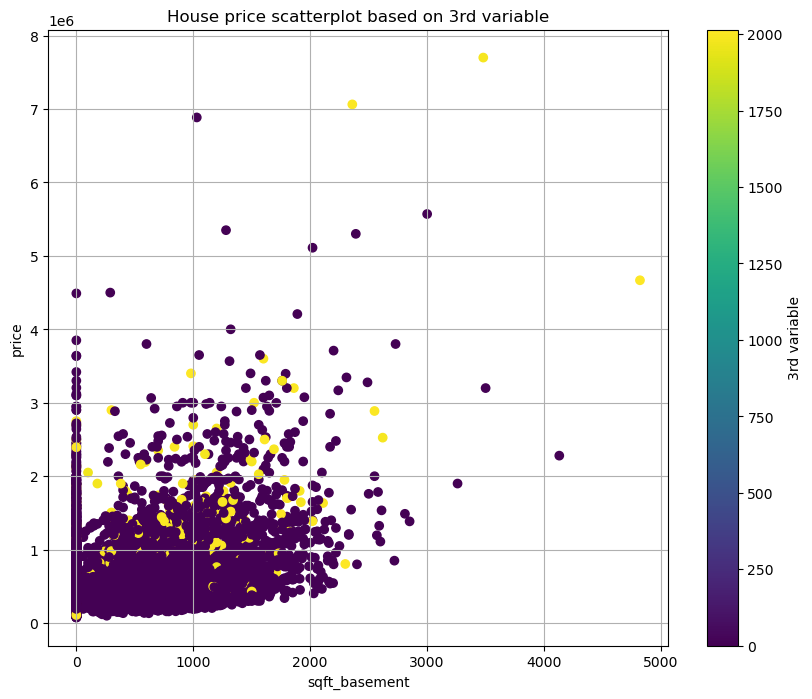

In [428]:
# sqft_basement vs price with 3rd variable color

third_variable = df['yr_renovated']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_new['sqft_basement'], df['price'], c=third_variable, cmap='viridis')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('3rd variable')

# Labels and title
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('House price scatterplot based on 3rd variable')
plt.grid(True)
plt.show()

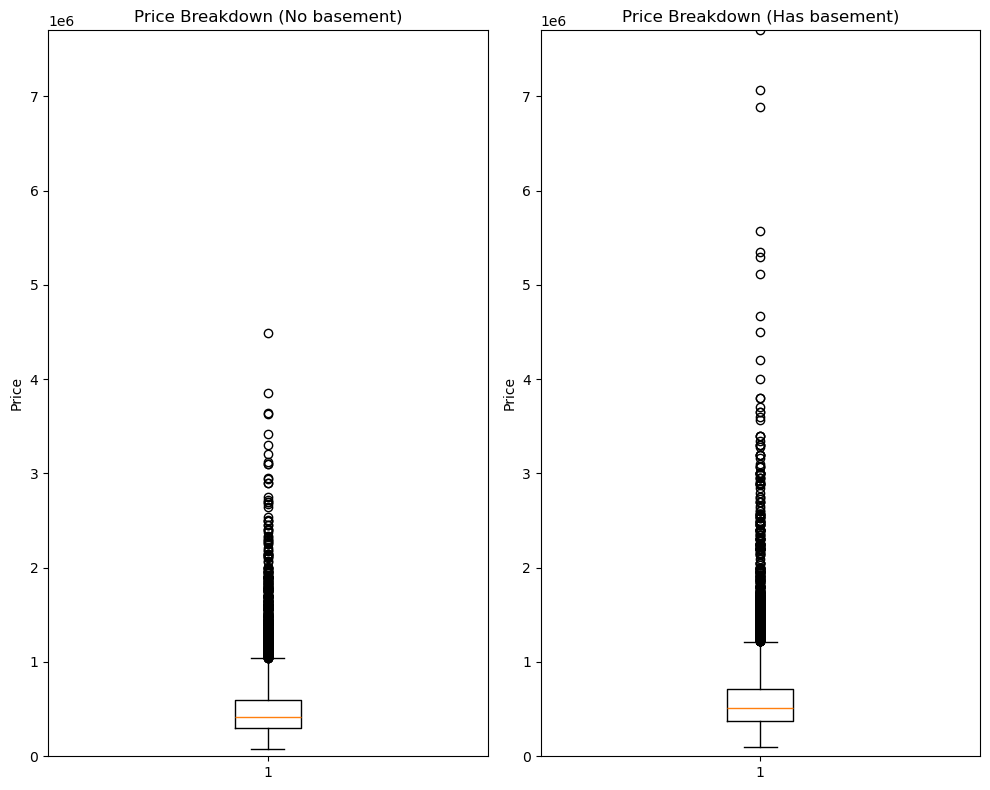

In [384]:
# Basement vs price

# Filter the data based on the condition
no_basement_data = df_new[df_new['sqft_basement'] == 0]  # Data when sqft_basement is 0
basement_data = df_new[df_new['sqft_basement'] > 0]      # Data when sqft_basement > 0

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Create the first boxplot (no view)
ax[0].boxplot(no_basement_data['price'])
ax[0].set_title('Price Breakdown (No basement)')
ax[0].set_ylabel('Price')

# Create the second boxplot (view > 0)
ax[1].boxplot(basement_data['price'])
ax[1].set_title('Price Breakdown (Has basement)')
ax[1].set_ylabel('Price')

ymin = min(0, 0)
ymax = max(no_basement_data['price'].max(), basement_data['price'].max())
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

# Display the boxplots
plt.tight_layout()
plt.show()

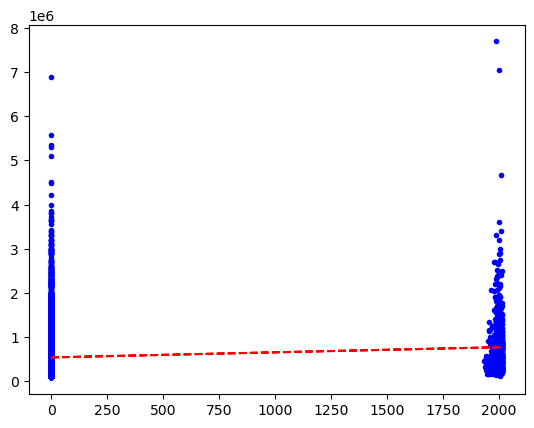

In [405]:
# yr_renovated and price regression
coef_reno_price = np.polyfit(df_new['yr_renovated'], df_new['price'], 1)

poly1d_reno_price = np.poly1d(coef_reno_price)
plt.plot(df_new['yr_renovated'],df_new['price'], 'b.', df_new['yr_renovated'], poly1d_reno_price(df_new['yr_renovated']), '--r')

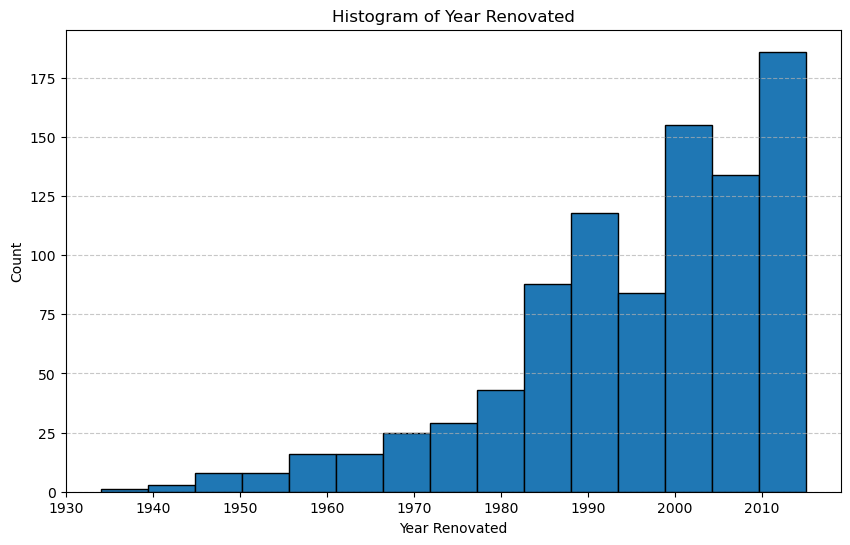

In [415]:
# yr_renovated histogram

yr_renovated = df_new['yr_renovated']

plt.figure(figsize=(10, 6))
plt.hist([year for year in yr_renovated if year != 0], bins=15, edgecolor='black')  # Exclude zeros

# Add labels and title
plt.xlabel('Year Renovated')
plt.ylabel('Count')
plt.title('Histogram of Year Renovated')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

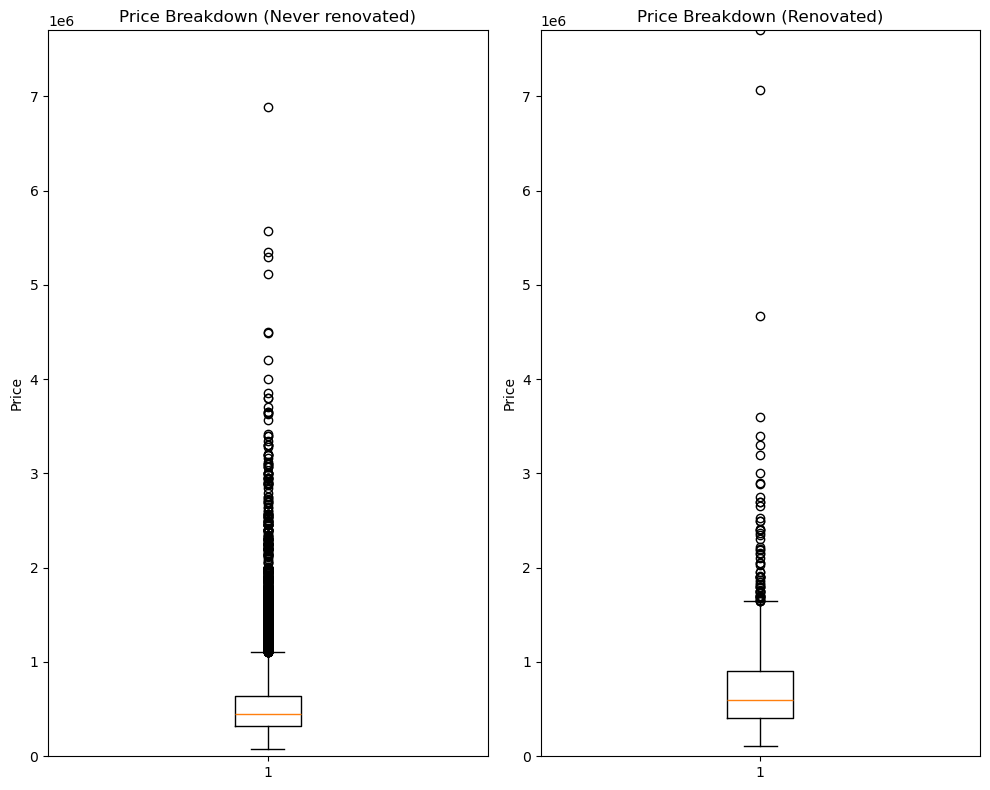

In [407]:
# yr_renovated vs price

# Filter the data based on the condition
never_reno_data = df_new[df_new['yr_renovated'] == 0]  # Data when never renovated
reno_data = df_new[df_new['yr_renovated'] > 0]      # Data when renovated

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Create the first boxplot (never reno)
ax[0].boxplot(never_reno_data['price'])
ax[0].set_title('Price Breakdown (Never renovated)')
ax[0].set_ylabel('Price')

# Create the second boxplot (reno)
ax[1].boxplot(reno_data['price'])
ax[1].set_title('Price Breakdown (Renovated)')
ax[1].set_ylabel('Price')

ymin = min(0, 0)
ymax = max(never_reno_data['price'].max(), reno_data['price'].max())
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)

# Display the boxplots
plt.tight_layout()
plt.show()

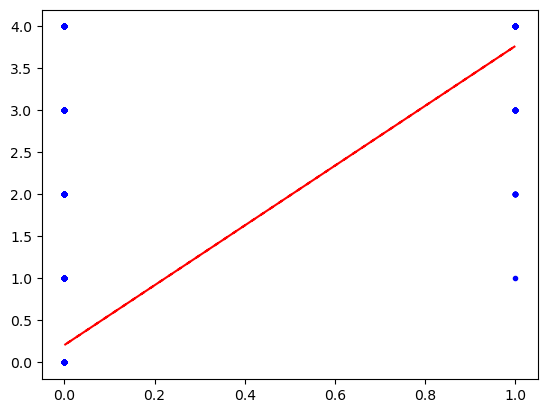

In [385]:
# Waterfront and view regression
coef_waterfront_view = np.polyfit(df_new['waterfront'], df_new['view'], 1)

poly1d_waterfront_view = np.poly1d(coef_waterfront_view)
plt.plot(df_new['waterfront'],df_new['view'], 'b.', df_new['waterfront'], poly1d_waterfront_view(df_new['waterfront']), '--r')

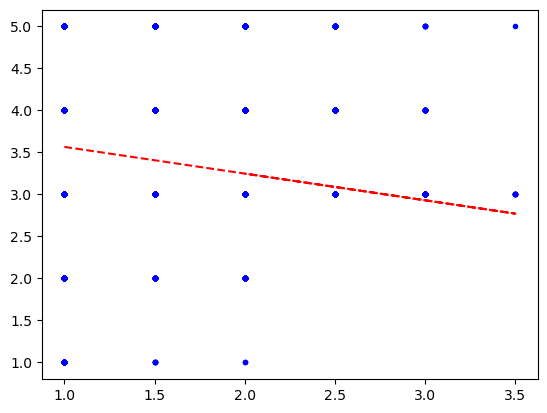

In [386]:
# Floors and condition regression
coef_floors_cond = np.polyfit(df_new['floors'], df_new['condition'], 1)

poly1d_floors_cond = np.poly1d(coef_floors_cond)
plt.plot(df_new['floors'],df_new['condition'], 'b.', df_new['floors'], poly1d_floors_cond(df_new['floors']), '--r')

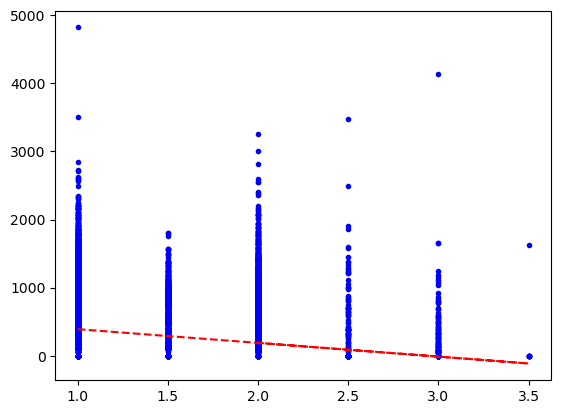

In [387]:
# Floors and sqft_basement regression
coef_floors_basement = np.polyfit(df_new['floors'], df_new['sqft_basement'], 1)

poly1d_floors_basement = np.poly1d(coef_floors_basement)
plt.plot(df_new['floors'],df_new['sqft_basement'], 'b.', df_new['floors'], poly1d_floors_basement(df_new['floors']), '--r')

In [421]:
# Regression model for price with all variables

df_X = df_new[['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_renovated']]
df_y = df_new[['price']]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                          test_size = 0.25,
                          random_state = 42)

train_shape = X_train.shape[0]
test_shape = X_test.shape[0]

train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)

df_model = sm.add_constant(X_train)
df_model_results = OLS(y_train, X_train).fit()
df_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              8742.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):                        0.00
Time:                        18:40:43   Log-Likelihood:                     -2.2720e+05
No. Observations:               16209   AIC:                                  4.544e+05
Df Residuals:                   16202   BIC:                                  4.545e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_lot          0.6141      0.062      9.952      0.000       0.493       0.735
floors         2.194e+05   3546.563     61.866      0.000    2.12e+05    2.26e+05
waterfront     5.002e+05   3.03e+04     16.493      0.000    4.41e+05     5.6e+05
view           1.128e+05   3442.357     32.754      0.000    1.06e+05    1.19e+05
condition      2.645e+04   1768.552     14.959      0.000     2.3e+04    2.99e+04
sqft_basement   257.7043      5.732     44.955      0.000     246.468     268.941
yr_renovated     68.2023      5.891     11.577      0.000      56.655      79.749
==============================================================================
Omnibus:                    13262.831   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           866319.038
Skew:                           3.493   Prob(JB):                         0.00
Kurtosis:                      38.127   Cond. No.                     5.29e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [422]:
# Regression model for price with higher correlated variables

df_X = df_num[['floors', 'waterfront', 'view', 'sqft_basement']]
df_y = df_num[['price']]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                          test_size = 0.25,
                          random_state = 42)

train_shape = X_train.shape[0]
test_shape = X_test.shape[0]

train_percent = train_shape/(train_shape + test_shape)
test_percent = test_shape/(train_shape + test_shape)

df_model = sm.add_constant(X_train)
df_model_results = OLS(y_train, X_train).fit()
df_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                          1.473e+04
Date:                Wed, 04 Dec 2024   Prob (F-statistic):                        0.00
Time:                        18:40:49   Log-Likelihood:                     -2.2745e+05
No. Observations:               16209   AIC:                                  4.549e+05
Df Residuals:                   16205   BIC:                                  4.549e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
floors         2.736e+05   1670.293    163.780      0.000     2.7e+05    2.77e+05
waterfront     5.213e+05   3.07e+04     16.961      0.000    4.61e+05    5.82e+05
view           1.149e+05   3482.979     32.988      0.000    1.08e+05    1.22e+05
sqft_basement   301.2450      5.257     57.308      0.000     290.942     311.548
==============================================================================
Omnibus:                    12436.650   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           707092.245
Skew:                           3.192   Prob(JB):                         0.00
Kurtosis:                      34.721   Cond. No.                     6.84e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""